In [1]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("/content/TelecomX_Limpio.csv", encoding="utf-8")

# Mostrar las primeras 5 filas
print(df.shape)      # (filas, columnas)
df.head()


(7043, 20)


,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [2]:
# Revisar columnas
print(df.columns)

# Eliminar columnas irrelevantes
cols_a_eliminar = ['customerID']  # agregá aquí más columnas si fueran identificadores únicos
df = df.drop(columns=cols_a_eliminar, errors='ignore')

# Confirmar que se eliminaron
print(df.columns)


Index(['Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')
Index(['Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'accoun

In [3]:
# Detectar columnas categóricas (tipo object o category)
categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Columnas categóricas detectadas:", categoricas)

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categoricas, drop_first=True)

# Verificar nueva estructura
print(df_encoded.shape)
df_encoded.head()


Columnas categóricas detectadas: ['Churn', 'customer_gender', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod']
(7043, 24)


,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total,Churn_Yes,customer_gender_Male,customer_Partner_Yes,customer_Dependents_Yes,phone_PhoneService_Yes,phone_MultipleLines_Yes,...,internet_DeviceProtection_Yes,internet_TechSupport_Yes,internet_StreamingTV_Yes,internet_StreamingMovies_Yes,account_Contract_One year,account_Contract_Two year,account_PaperlessBilling_Yes,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0,9,65.6,593.30,False,False,True,True,True,False,...,False,True,True,False,True,False,True,False,False,True
1,0,9,59.9,542.40,False,True,False,False,True,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,True,True,False,False,True,False,...,True,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,True,True,True,False,True,False,...,True,False,True,True,False,False,True,False,True,False
4,1,3,83.9,267.40,True,False,True,False,True,False,...,False,True,True,False,False,False,True,False,False,True


In [4]:
# Calcular conteo y proporción
conteo = df['Churn'].value_counts()
proporcion = df['Churn'].value_counts(normalize=True) * 100

print("Conteo de clases:")
print(conteo)
print("\nProporción de clases (%):")
print(proporcion)


Conteo de clases:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Proporción de clases (%):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [5]:
print(df_encoded.columns.tolist())


['customer_SeniorCitizen', 'customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total', 'Churn_Yes', 'customer_gender_Male', 'customer_Partner_Yes', 'customer_Dependents_Yes', 'phone_PhoneService_Yes', 'phone_MultipleLines_Yes', 'internet_InternetService_Fiber optic', 'internet_InternetService_No', 'internet_OnlineSecurity_Yes', 'internet_OnlineBackup_Yes', 'internet_DeviceProtection_Yes', 'internet_TechSupport_Yes', 'internet_StreamingTV_Yes', 'internet_StreamingMovies_Yes', 'account_Contract_One year', 'account_Contract_Two year', 'account_PaperlessBilling_Yes', 'account_PaymentMethod_Credit card (automatic)', 'account_PaymentMethod_Electronic check', 'account_PaymentMethod_Mailed check']


In [6]:
from sklearn.preprocessing import StandardScaler
X = df_encoded.drop(columns=['Churn_Yes'])  # todas las columnas menos la target
y = df_encoded['Churn_Yes']                 # target

# Identificar columnas numéricas (excluyendo target)
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

print("Columnas numéricas a escalar:", numeric_cols.tolist())

# Escalador
scaler = StandardScaler()

# Aplicar solo sobre columnas numéricas
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X_scaled[numeric_cols])

# Verificar resultado
X_scaled.head()


Columnas numéricas a escalar: ['customer_SeniorCitizen', 'customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total']


,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total,customer_gender_Male,customer_Partner_Yes,customer_Dependents_Yes,phone_PhoneService_Yes,phone_MultipleLines_Yes,internet_InternetService_Fiber optic,...,internet_DeviceProtection_Yes,internet_TechSupport_Yes,internet_StreamingTV_Yes,internet_StreamingMovies_Yes,account_Contract_One year,account_Contract_Two year,account_PaperlessBilling_Yes,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,-0.439916,-0.951682,0.027862,-0.745607,False,True,True,True,False,False,...,False,True,True,False,True,False,True,False,False,True
1,-0.439916,-0.951682,-0.161583,-0.768063,True,False,False,True,True,False,...,False,False,False,True,False,False,False,False,False,True
2,-0.439916,-1.155283,0.303720,-0.883456,True,False,False,True,False,True,...,True,False,False,False,False,False,True,False,True,False
3,2.273159,-0.788800,1.104706,-0.461240,True,True,False,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,2.273159,-1.196004,0.636080,-0.889390,False,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


Correlaciones con la cancelación:
Churn_Yes                                        1.000000
internet_InternetService_Fiber optic             0.308020
account_PaymentMethod_Electronic check           0.301919
account_Charges_Monthly                          0.193356
account_PaperlessBilling_Yes                     0.191825
customer_SeniorCitizen                           0.150889
internet_StreamingTV_Yes                         0.063228
internet_StreamingMovies_Yes                     0.061382
phone_MultipleLines_Yes                          0.040102
phone_PhoneService_Yes                           0.011942
customer_gender_Male                            -0.008612
internet_DeviceProtection_Yes                   -0.066160
internet_OnlineBackup_Yes                       -0.082255
account_PaymentMethod_Mailed check              -0.091683
account_PaymentMethod_Credit card (automatic)   -0.134302
customer_Partner_Yes                            -0.150448
customer_Dependents_Yes               

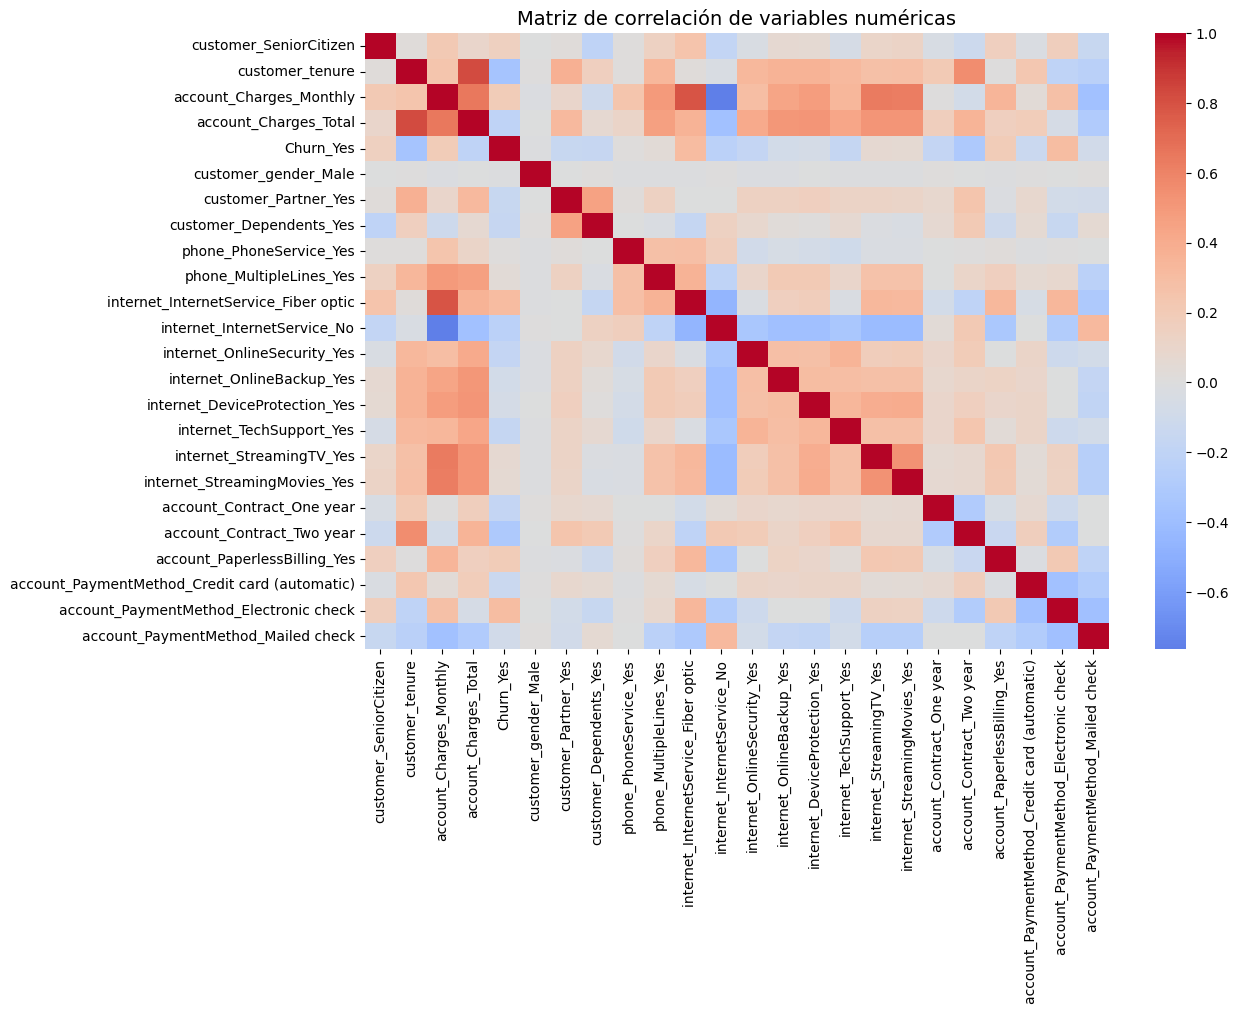

/tmp/ipython-input-3250832447.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target, y=corr_target.index, palette="coolwarm")


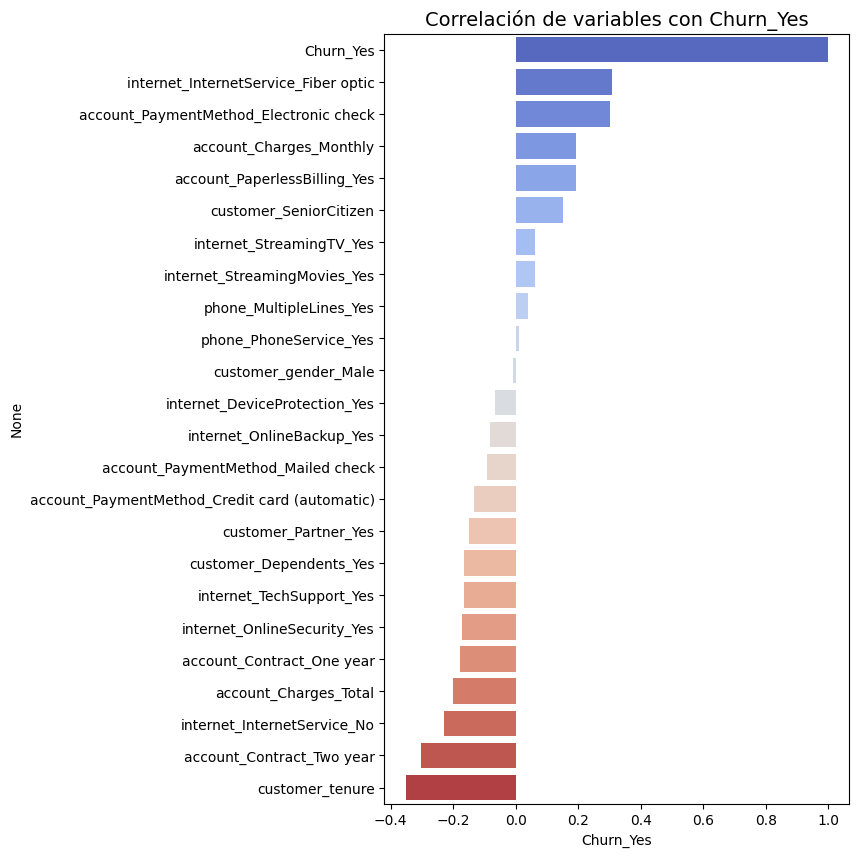

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Usar el nombre correcto de la variable objetivo
target_col = 'Churn_Yes'  # cambia si tu target se llama distinto

# Calcular la correlación de todas las columnas numéricas
corr_matrix = df_encoded.corr()

# Ordenar por correlación con la variable objetivo
corr_target = corr_matrix[target_col].sort_values(ascending=False)

print("Correlaciones con la cancelación:")
print(corr_target)

# Visualizar matriz completa
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Matriz de correlación de variables numéricas", fontsize=14)
plt.show()

# Visualizar solo correlación con la variable objetivo
plt.figure(figsize=(6, 10))
sns.barplot(x=corr_target, y=corr_target.index, palette="coolwarm")
plt.title(f"Correlación de variables con {target_col}", fontsize=14)
plt.show()


Análisis Dirigido

In [8]:
print(df.columns.tolist())


['Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges_Monthly', 'account_Charges_Total']


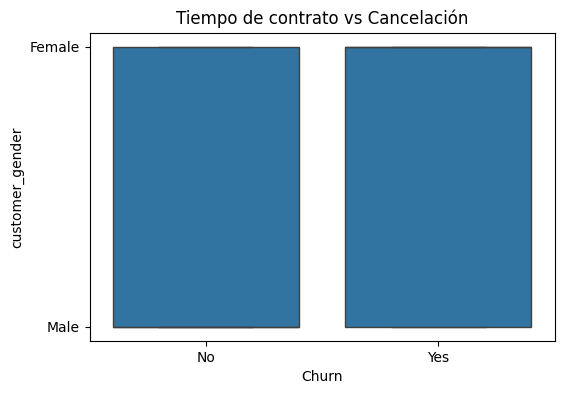

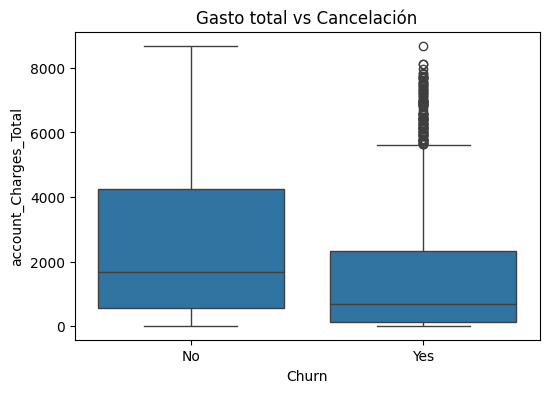

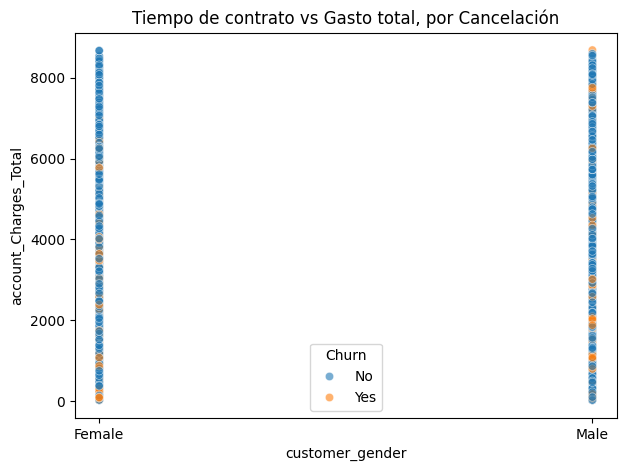

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Nombres reales de las columnas
col_tiempo = 'customer_gender'
col_gasto  = 'account_Charges_Total'
col_target = 'Churn'

# Si el target está en 0/1, lo pasamos a Yes/No
if set(df[col_target].unique()) <= {0, 1}:
    df[col_target] = df[col_target].map({1: 'Yes', 0: 'No'})

# Boxplot: Tiempo de contrato vs Cancelación
plt.figure(figsize=(6,4))
sns.boxplot(x=col_target, y=col_tiempo, data=df)
plt.title("Tiempo de contrato vs Cancelación")
plt.show()

# Boxplot: Gasto total vs Cancelación
plt.figure(figsize=(6,4))
sns.boxplot(x=col_target, y=col_gasto, data=df)
plt.title("Gasto total vs Cancelación")
plt.show()

# Scatter plot: Tiempo vs Gasto, coloreado por Cancelación
plt.figure(figsize=(7,5))
sns.scatterplot(x=col_tiempo, y=col_gasto, hue=col_target, data=df, alpha=0.6)
plt.title("Tiempo de contrato vs Gasto total, por Cancelación")
plt.show()



Separación de datos

In [10]:
from sklearn.model_selection import train_test_split

# X = variables predictoras, y = target
# Cambia 'Churn_Yes' por el nombre correcto de tu columna target
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

# Separar datos 80% train, 20% test con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% test
    random_state=42,      # reproducibilidad
    stratify=y            # mantiene la proporción de clases
)

# Ver tamaños de cada grupo
print("Tamaño Train:", X_train.shape, "Target Train:", y_train.shape)
print("Tamaño Test:", X_test.shape, "Target Test:", y_test.shape)


Tamaño Train: (5634, 23) Target Train: (5634,)
Tamaño Test: (1409, 23) Target Test: (1409,)


Creación de modelos

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# === 1. Imputación para valores faltantes ===
imputer = SimpleImputer(strategy='median')  # reemplaza NaN por mediana
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# === 2. Normalización para modelos sensibles a escala ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# === 3. Modelo 1: Regresión Logística ===
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print("=== Modelo 1: Regresión Logística ===")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# === 4. Modelo 2: Random Forest ===
rf_model = RandomForestClassifier(random_state=42, n_estimators=200)
rf_model.fit(X_train_imputed, y_train)
y_pred_rf = rf_model.predict(X_test_imputed)

print("\n=== Modelo 2: Random Forest ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


=== Modelo 1: Regresión Logística ===
[[924 111]
 [179 195]]
              precision    recall  f1-score   support

       False       0.84      0.89      0.86      1035
        True       0.64      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409


=== Modelo 2: Random Forest ===
[[933 102]
 [195 179]]
              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1035
        True       0.64      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409




📊 Regresión Logística
Exactitud (Accuracy): 0.7942
Precisión: 0.6373
Recall: 0.5214
F1-score: 0.5735

Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.84      0.89      0.86      1035
        True       0.64      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409


📊 Random Forest
Exactitud (Accuracy): 0.7892
Precisión: 0.6370
Recall: 0.4786
F1-score: 0.5466

Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.83      0.90      0.86      1035
        True       0.64      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



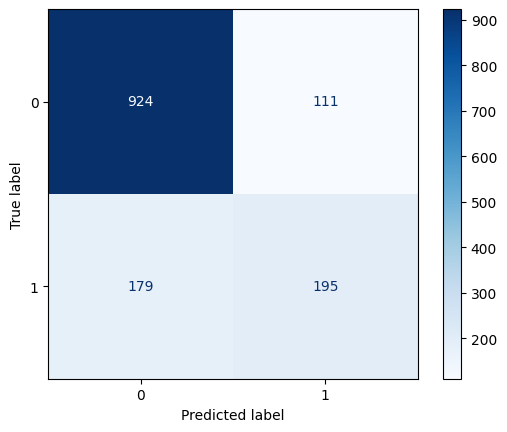

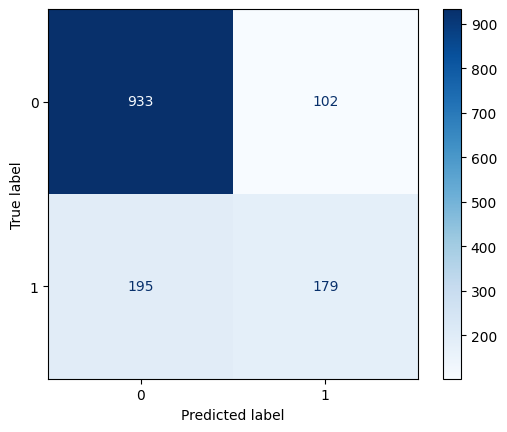

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)

# === 1. Imputación para valores faltantes ===
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# === 2. Escalado para la Regresión Logística ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# === 3. Modelo 1: Regresión Logística ===
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# === 4. Modelo 2: Random Forest ===
rf_model = RandomForestClassifier(random_state=42, n_estimators=200)
rf_model.fit(X_train_imputed, y_train)
y_pred_rf = rf_model.predict(X_test_imputed)

# === 5. Función para evaluar modelos ===
def evaluar_modelo(nombre, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n📊 {nombre}")
    print(f"Exactitud (Accuracy): {acc:.4f}")
    print(f"Precisión: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nReporte de clasificación:\n", classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm).plot(cmap='Blues')

# === 6. Evaluar ambos modelos ===
evaluar_modelo("Regresión Logística", y_test, y_pred_log)
evaluar_modelo("Random Forest", y_test, y_pred_rf)


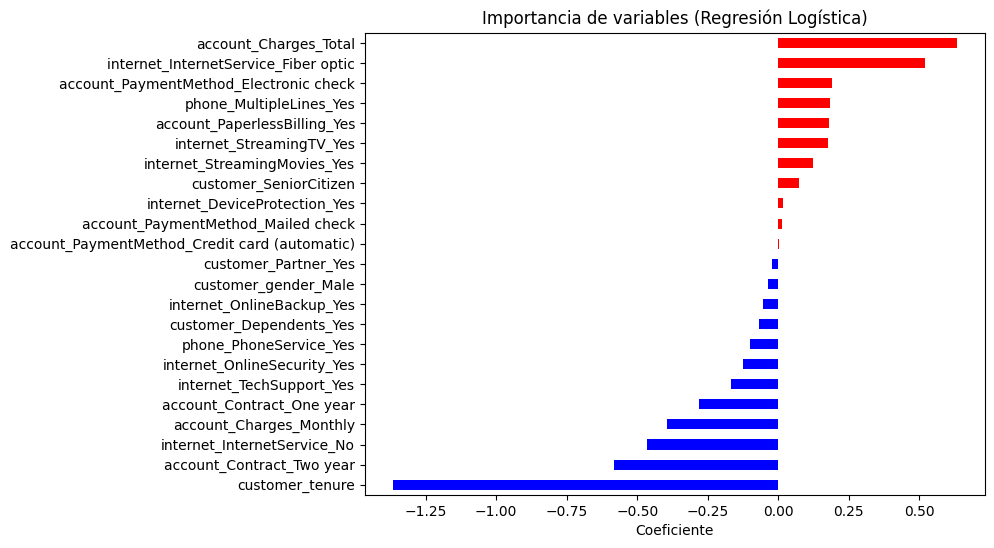

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Coeficientes de la regresión logística
coef_log = pd.Series(log_model.coef_[0], index=X_train.columns)

# Ordenar por importancia
coef_log_sorted = coef_log.sort_values()

plt.figure(figsize=(8,6))
coef_log_sorted.plot(kind='barh', color=np.where(coef_log_sorted > 0, 'red', 'blue'))
plt.title("Importancia de variables (Regresión Logística)")
plt.xlabel("Coeficiente")
plt.show()
